In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv('F:/Pandas/jamb_exam_results.csv')
df1=df.copy()
df.columns = df.columns.str.lower().str.replace(' ','_')
del df['student_id']

In [2]:
df=df.fillna(0)

In [3]:

from sklearn.model_selection import train_test_split
df_full_train,df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
print(df_full_train.shape, df_train.shape, df_val.shape, df_test.shape)



(4000, 16) (3000, 16) (1000, 16) (1000, 16)


In [4]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [5]:
from sklearn.feature_extraction import DictVectorizer
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse = True)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

In [6]:
from sklearn.tree import DecisionTreeRegressor, export_text
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [7]:
df.columns

Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
       'teacher_quality', 'distance_to_school', 'school_type',
       'school_location', 'extra_tutorials', 'access_to_learning_materials',
       'parent_involvement', 'it_knowledge', 'age', 'gender',
       'socioeconomic_status', 'parent_education_level',
       'assignments_completed'],
      dtype='object')

In [8]:
print(export_text(dt, feature_names= dv.feature_names_))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm  # Instead of tqdm.auto

!pip install --upgrade ipywidgets

scores = []

rf = RandomForestRegressor(
    n_estimators=1,
    random_state=1,
    n_jobs=-1,
    warm_start=True,
)

for n in tqdm(range(10, 201, 10)):
    rf.n_estimators = n
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    scores.append((n, score))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

  0%|          | 0/20 [00:00<?, ?it/s]

In [32]:
scores = []

for n in tqdm(range(10, 201, 10)):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    scores.append((n, score))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
print(df_scores)

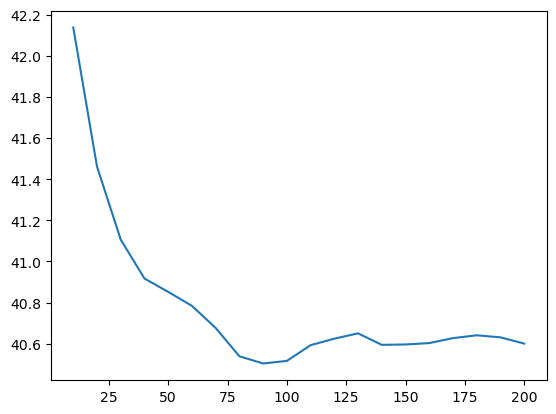

In [35]:
plot=plt.plot(df_scores.n_estimators, df_scores.rmse,label= True)

In [38]:
import xgboost as xgb

In [44]:
# features = dv.feature_names_
# features = [f.replace('<', 'less') for f in features]
# features

In [46]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [52]:
watchlist= [(dtrain, 'train'), (dval,'val')]
scores = {}

In [60]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}


model = xgb.train( params=xgb_params, 
                  dtrain=dtrain,
                  num_boost_round=100,
                  evals=watchlist,
                  verbose_eval=True)



[0]	train-rmse:45.49999	val-rmse:47.00533
[1]	train-rmse:44.12948	val-rmse:45.92344
[2]	train-rmse:42.94858	val-rmse:44.98366
[3]	train-rmse:41.90896	val-rmse:44.25755
[4]	train-rmse:40.96728	val-rmse:43.57339
[5]	train-rmse:40.17514	val-rmse:43.11181
[6]	train-rmse:39.40436	val-rmse:42.61054
[7]	train-rmse:38.71199	val-rmse:42.18883
[8]	train-rmse:38.08081	val-rmse:41.86754
[9]	train-rmse:37.57559	val-rmse:41.64338
[10]	train-rmse:37.07490	val-rmse:41.39235
[11]	train-rmse:36.58709	val-rmse:41.14265
[12]	train-rmse:36.14574	val-rmse:40.95201
[13]	train-rmse:35.76896	val-rmse:40.81778
[14]	train-rmse:35.40802	val-rmse:40.75008
[15]	train-rmse:35.08521	val-rmse:40.61341
[16]	train-rmse:34.74187	val-rmse:40.51800
[17]	train-rmse:34.43969	val-rmse:40.41659
[18]	train-rmse:34.16132	val-rmse:40.33546
[19]	train-rmse:33.91836	val-rmse:40.25632
[20]	train-rmse:33.67389	val-rmse:40.25010
[21]	train-rmse:33.45853	val-rmse:40.19826
[22]	train-rmse:33.23371	val-rmse:40.21101
[23]	train-rmse:32.98